Picking indexes
Loading available index form :  CD_index.txt
Loading chosen index form :  chosen_indexes.txt
      A     T     C     G
0  0.05  0.50  0.30  0.15
1  0.45  0.05  0.20  0.30
2  0.35  0.30  0.15  0.20
3  0.35  0.15  0.10  0.40
4  0.05  0.05  0.45  0.45
5  0.25  0.25  0.35  0.15
6  0.30  0.10  0.15  0.45
7  0.35  0.15  0.15  0.35


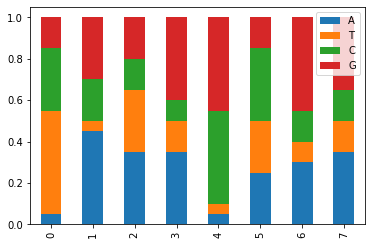

In [3]:
import sys 
import pandas as pd
import matplotlib.pyplot as plt
### using the index below for development, will use dual combinatorial index

def load_all_index(filepath):
    print("Loading available index form : ",filepath)
    ### build a dictionary of available index by pandas df, then to dict
    index_dict = pd.read_csv(filepath,sep="\t").to_dict(orient= 'index')
    return index_dict

def load_chosen_index(filepath):
    print("Loading chosen index form : ",filepath)
    ### build a dictionary of available index by pandas df, then to dict
    index_dict = pd.read_csv(filepath,sep="\t").to_dict(orient= 'index')
    return index_dict

def get_sequence_from_dict_to_list(inputDict,field_name):
    outputList = []
    for item in inputDict:
        # print(inputDict[item].get("Weight"))
        outputList.append((inputDict[item].get(field_name),float(inputDict[item].get("Weight"))))
    return outputList
    # return outputList
def get_sequence_length(inputSeq):
    return len(inputSeq)
def get_base_composition(inputList):
    ### expecting a list of tuples of valid sequence
    #### take the first item of the input list to tell the length of the sequence
    seq_length = get_sequence_length(inputList[0][0])
    # print(seq_length)
    #### goal is to get a per position matrix of base distribution, store that in a dictionary 
    string_composition_list =[]
    
    for base in range(seq_length):
        position_composition_dict = {"A":0, "T":0,"C": 0, "G":0}
        for idx,item in enumerate(inputList):
            sequence = item[0]
            weight = item[1]
            position_composition_dict[sequence[base]] = position_composition_dict[sequence[base]] + weight
        string_composition_list.append(position_composition_dict)
    return string_composition_list
def main():

    print("Picking indexes")
    # ava_index_dict = load_all_index(sys.argv[1])
    ava_index_dict = load_all_index("CD_index.txt")
    # chosen_index_dict = load_chosen_index(sys.argv[2])
    chosen_index_dict = load_chosen_index("chosen_indexes.txt")
    chosen_I7_seq_list = get_sequence_from_dict_to_list(chosen_index_dict,"I7_sequence")
    chosen_I5_seq_list = get_sequence_from_dict_to_list(chosen_index_dict,"I5_sequence")
    # print(chosen_I7_seq_list,chosen_I5_seq_list)
    ### get the base composition from chosen indexes
    I7_base_composition = get_base_composition(chosen_I7_seq_list)
    I5_base_composition = get_base_composition(chosen_I5_seq_list)
    I7_df  = pd.DataFrame(I7_base_composition)
    print(I7_df)
    I7_df.plot(kind="bar", stacked=True)
    
main()
